In [1]:
import os
from glob import glob # File manipulation
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep



In [2]:
dirpath = r'J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\Original'
search_criteria = "*.tif"
q = os.path.join(dirpath, search_criteria)
print(q)


J:\\CSE books\\4-1\\Thesis\\out\\BGD_\\Original\*.tif


In [3]:
all_bd = glob(q)
all_bd


['J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F142003.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152003.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152004.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152005.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152006.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152007.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162004.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162005.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162006.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\

In [4]:
all_bd.sort()
all_bd



['J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F142003.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152003.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152004.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152005.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152006.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F152007.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162004.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162005.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\\out\\\\BGD_\\\\Original\\F162006.v4b_web.stable_lights.avg_vis.tif',
 'J:\\\\CSE books\\\\4-1\\\\Thesis\\\

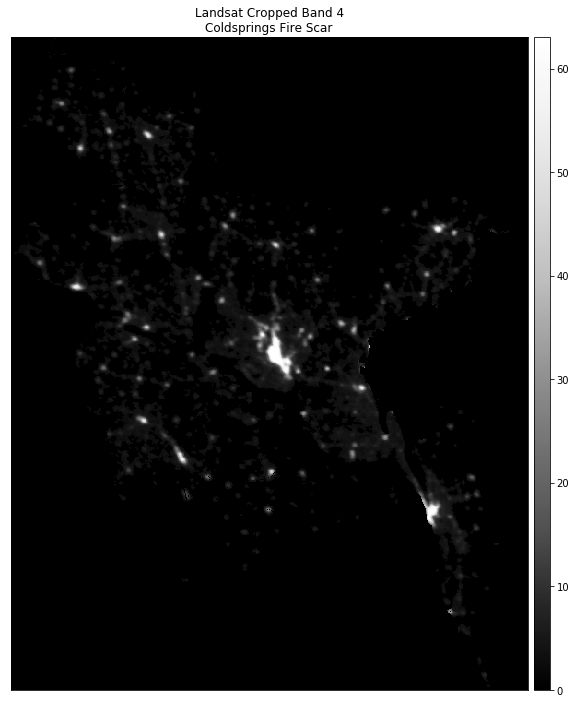

In [9]:
with rio.open(all_bd[0]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band 4\nColdsprings Fire Scar",
              scale=False)
plt.show()



In [7]:
out = 'J:\\CSE books\\4-1\\Thesis'
landsat_post_fire_path = os.path.join(out, "data", "coldspringsfire", 
                                      "outputs", "landsat_post_fire.tif")

# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(all_bd,
                                 landsat_post_fire_path)


In [11]:
all_bd.sort()
all_bd
landsat_post_fire_path


'J:\\CSE books\\4-1\\Thesis\\data\\coldspringsfire\\outputs\\landsat_post_fire.tif'

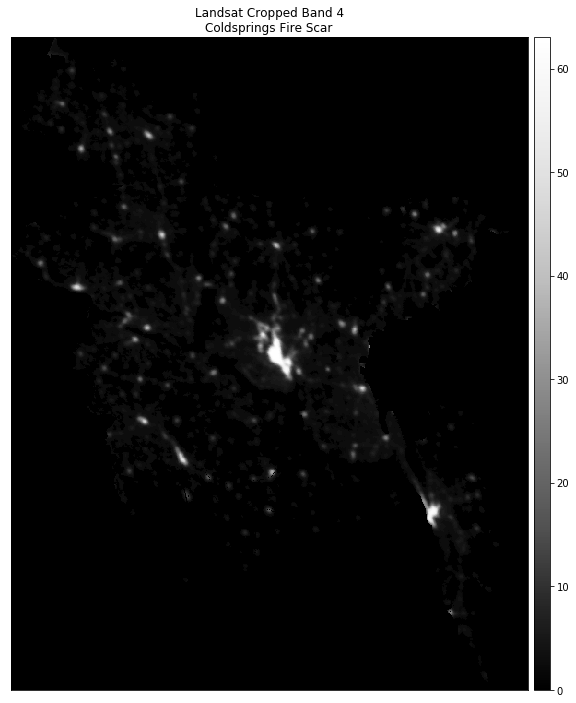

In [8]:
with rio.open(all_bd[3]) as src:
    landsat_band4 = src.read()

ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band 4\nColdsprings Fire Scar",
              scale=False)
plt.show()



In [13]:
landsat_post_fire_path = os.path.join(out, "data", "coldspringsfire", 
                                      "outputs", "landsat_post_fire.tif")

# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(all_bd,
                                 landsat_post_fire_path)



In [14]:
from rasterio.merge import merge
from rasterio.plot import show
with rio.open(landsat_post_fire_path) as src:
    landsat_post_fire = src.read()
# Plot all bands using earthpy


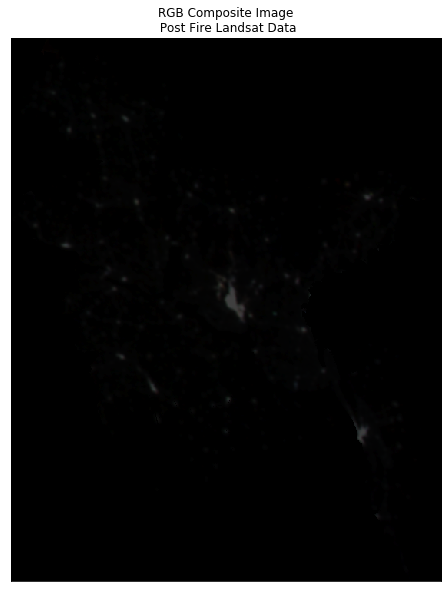

In [15]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()

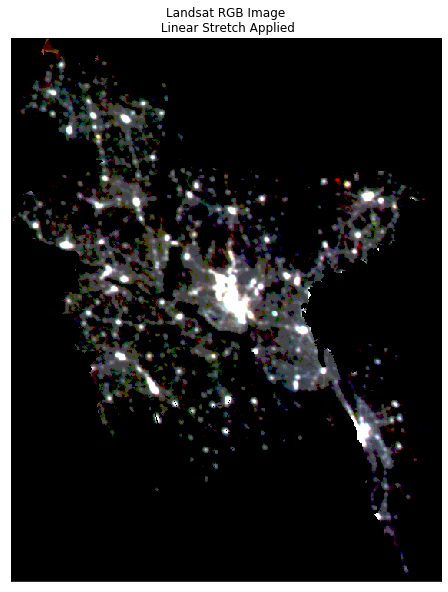

In [16]:
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()

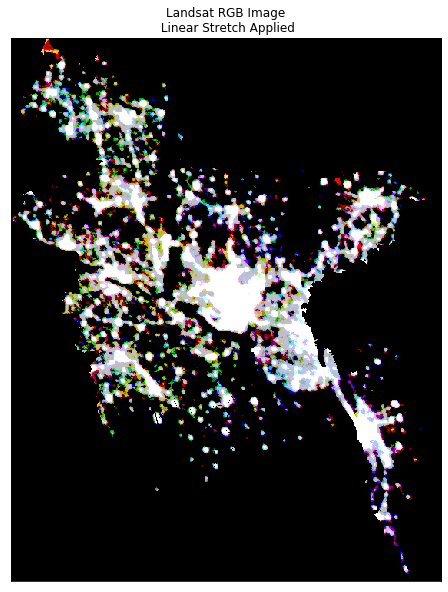

In [17]:
# Adjust the amount of linear stretch to futher brighten the image
ep.plot_rgb(landsat_post_fire,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4)
plt.show()

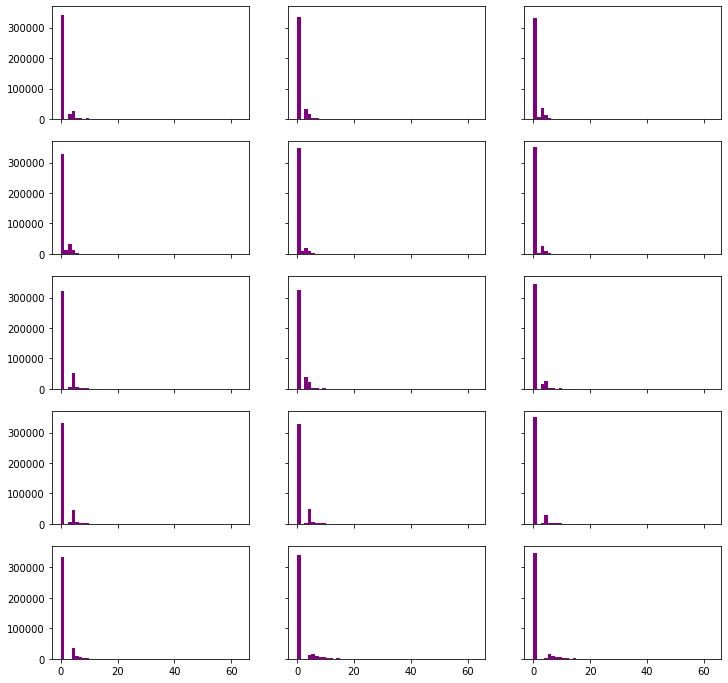

In [18]:
ep.hist(landsat_post_fire, bins=50,cols=3)

plt.show()


(<Figure size 864x864 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFA55D02C8>,
       dtype=object))

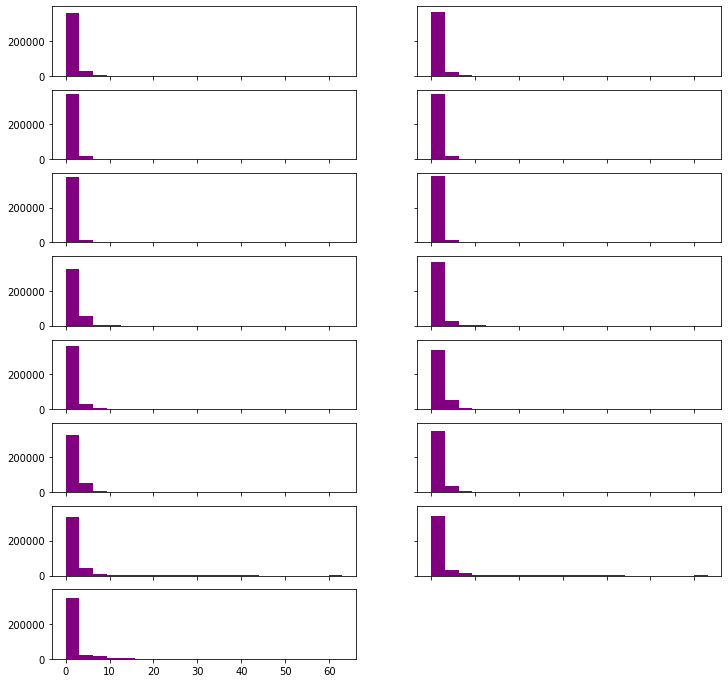

In [19]:
ep.hist(landsat_post_fire)

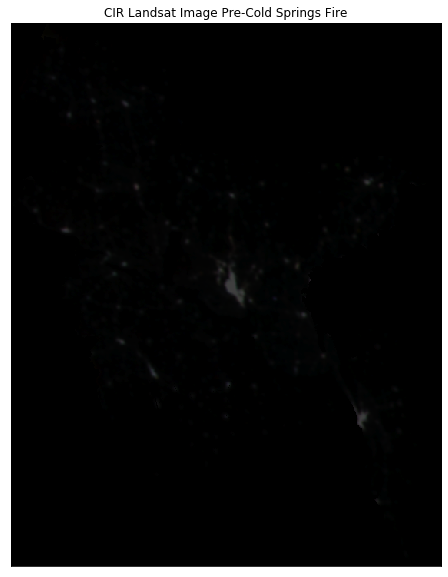

In [20]:
ep.plot_rgb(landsat_post_fire, rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
plt.show()

In [25]:
landsat_post_fire

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 